Let us look how compute the frequency-dependent phase $\varphi(\nu)$. 
The idea, according to what done in Matsumura2009 (http://www.jon.fysik.su.se/references/hwp_papers/Matsumura2009.pdf), is to take as $\varphi(\nu)$ the value of the half-wave plate angle $\alpha$ for which the intensity reach the first maximum. As intensity we consider the $M_{IQ}^{instr}$ (we can also discuss if this choise is correct). 
For an 1-layer HWP the first maximum occurs at $\alpha = 0$ for an AHWP this is not true. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from beamconv import Beam
import time

We set the range for the frequency $\nu$ and for the half-wave plate angle $\alpha$. Setting $els = 0$ means that we are in the normal incidence case. 

In [2]:
nu = np.arange(55, 185, 0.2)
els = 0.
alpha = np.linspace(0,180,1801)

This function compute the $\varphi(\nu)$ for one AHWP for each frequency in the range above.
The mothod 'set_hwp_mueller' compute the mueller matrix fro the AHWP and 'get_mueller_top_row_full' compute the matrix $M^{instr}$ descibed by eq.5 in the LaTeX file.  

In [3]:
def computing_offset_AHWP(nu,el,ahwp_name):
    M = np.zeros((3,alpha.size), dtype=complex)
    phase = np.zeros(nu.size)
    beam = Beam()
    beam.el = el
    for j, freq in enumerate(nu):
        beam.sensitive_freq = freq
        beam.set_hwp_mueller(model_name=ahwp_name)
        M[:,:] = beam.get_mueller_top_row_full(psi=np.zeros(alpha.size),\
                                               xi=np.zeros(alpha.size), alpha=np.radians(alpha))

        phase[j] = np.radians(alpha[np.argmax(np.real(M[1,:800]), axis=0)])
    return(phase)

In [4]:
ph3 = np.rad2deg(computing_offset_AHWP(nu,els,'3BR'))

AttributeError: 'Beam' object has no attribute 'get_mueller_top_row_full'

We plot now the frequency-dependent phase $\varphi(\nu)$.

NameError: name 'ph3' is not defined

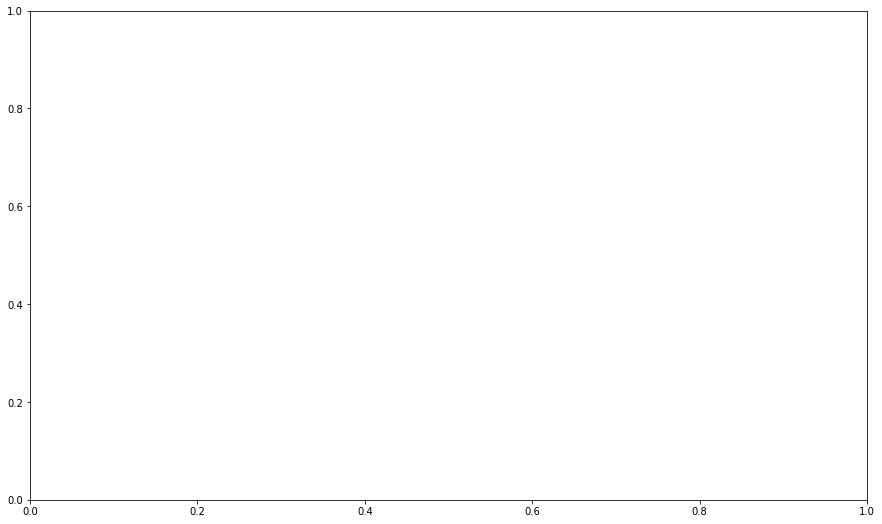

In [5]:
####################### 1D PLOT #######################
f = plt.figure(figsize=(15, 9))
ax = f.add_subplot(111)
plt.rcParams['axes.labelsize'] = 13

ax.plot(nu, ph3[:], color = 'orange', linestyle = '-', alpha = 1.,label='BR3')

## to plot our frequency-bands
ymax = ph3[:].max()
ymin = ph3[:].min()
y = [ymin,ymax]
ax.fill_betweenx(y = y, x1 = 80, x2 = 110, color='grey', alpha=0.5)
ax.fill_betweenx(y = y, x1 = 135,x2 = 165, color='grey', alpha=0.5)

ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Offset angle (deg)')

f.subplots_adjust(right=0.75)
plt.legend(bbox_to_anchor=(1.04,.0), loc="lower left", borderaxespad=0.1, prop={'size': 12}, facecolor='white',  
    edgecolor='black', framealpha=1, ncol=1)


Now to get the offset angle $\varphi_0$ we have to use eq.28 of our paper.